##### *Reminder - use daily log to track progress

In [1]:
#!pip install librosa

In [1]:
import pandas as pd
import numpy as np
import os, pathlib
from sklearn.model_selection import train_test_split
import librosa
#import torch
import IPython.display as ipd
from random import randint

In [2]:
#!sudo apt-get install wget unzip

In [3]:
# Download training data
#!mkdir -p data && cd data && wget https://irmas-dataset.s3-eu-west-1.amazonaws.com/IRMAS-TrainingData.zip && unzip IRMAS-TrainingData.zip 

In [4]:
#Download testing data (Around 2GB each)
#wget https://irmas-dataset.s3-eu-west-1.amazonaws.com/IRMAS-TestingData-Part1.zip && IRMAS-TestingData-Part1.zip
#wget https://irmas-dataset.s3-eu-west-1.amazonaws.com/IRMAS-TestingData-Part2.zip && IRMAS-TestingData-Part2.zip
#wget https://irmas-dataset.s3-eu-west-1.amazonaws.com/IRMAS-TestingData-Part3.zip && IRMAS-TestingData-Part3.zip    

IRMAS dataset (training)
 
Audio files: 6705 audio files in 16 bit stereo wav format sampled at 44.1kHz. They are excerpts of 3 seconds from more than 2000 distinct recordings. 

Annotations: The annotation of the predominant instrument of each excerpt is both in the name of the containing folder, and in the file name: cello (cel), clarinet (cla), flute (flu), acoustic guitar (gac), electric guitar (gel), organ (org), piano (pia), saxophone (sax), trumpet (tru), violin (vio), and human singing voice (voi). The number of files per instrument are: cel(388), cla(505), flu(451), gac(637), gel(760), org(682), pia(721), sax(626), tru(577), vio(580), voi(778). 

Additionally, some of the files have annotations in the filename regarding the presence ([dru]) or non presence([nod]) of drums, and the musical genre: country-folk ([cou_fol]), classical ([cla]), pop-rock ([pop-roc]), latin-soul ([lat-sou]).

In [5]:
IRMAS_TRAINING = 'data/IRMAS-TrainingData'
base_path = pathlib.Path(IRMAS_TRAINING)
classes, paths = [], []

for p in base_path.glob('*/*'):
    relative_path = p.relative_to(base_path)
    classes.append(str(relative_path.parent))
    paths.append(p)
    
#classes = set(classes)
df = pd.DataFrame({"tags": classes, "wav_path": paths}).sample(frac=1)#.reset_index(drop=True)#, inplace=True)
#df_training.piano = df.tags.map({'pia': True, '': 0})
#df.tags = df.tags.map({'pia': True, })
df.reset_index(drop=True, inplace=True)
df.head(5)

,tags,wav_path
0,sax,data/IRMAS-TrainingData/sax/[sax][jaz_blu]1783...
1,flu,data/IRMAS-TrainingData/flu/024__[flu][nod][cl...
2,org,data/IRMAS-TrainingData/org/[org][pop_roc]1264...
3,org,data/IRMAS-TrainingData/org/[org][jaz_blu]1154...
4,sax,data/IRMAS-TrainingData/sax/010__[sax][nod][cl...


In [6]:
df.shape

(6705, 2)

In [7]:
classes = set(classes)

In [8]:
classes

{'cel', 'cla', 'flu', 'gac', 'gel', 'org', 'pia', 'sax', 'tru', 'vio', 'voi'}

In [9]:
amount_of_labels = len(classes)

In [10]:
classes = list(classes)

In [11]:
classes

['cel', 'sax', 'tru', 'flu', 'gac', 'org', 'vio', 'cla', 'voi', 'pia', 'gel']

In [12]:
type(classes)

list

In [13]:
#inst_dict = {1:'cel', 2:'cla', 3:'flu', 4:'gac', 5:'gel',6:'org',7:'pia',8:'sax',9:'tru',10:'vio',11:'voi'}

In [14]:
c_list = set(df.tags)

In [15]:
len(c_list)

11

In [16]:
c_list = set(df.tags)
c_list = sorted(list(c_list))
c_dict =  { i: c_list[i] for i in range(0, len(c_list))}

In [17]:
c_dict

{0: 'cel',
 1: 'cla',
 2: 'flu',
 3: 'gac',
 4: 'gel',
 5: 'org',
 6: 'pia',
 7: 'sax',
 8: 'tru',
 9: 'vio',
 10: 'voi'}

In [18]:
inverted_dict = dict(map(reversed, c_dict.items()))

In [19]:
inverted_dict

{'cel': 0,
 'cla': 1,
 'flu': 2,
 'gac': 3,
 'gel': 4,
 'org': 5,
 'pia': 6,
 'sax': 7,
 'tru': 8,
 'vio': 9,
 'voi': 10}

In [20]:
class_dict = { i: classes[i] for i in range(0, len(classes))}

In [21]:
class_dict

{0: 'cel',
 1: 'sax',
 2: 'tru',
 3: 'flu',
 4: 'gac',
 5: 'org',
 6: 'vio',
 7: 'cla',
 8: 'voi',
 9: 'pia',
 10: 'gel'}

In [22]:
class_dict[9]

'pia'

In [23]:
df_train, df_test = train_test_split(df, test_size=0.3)

In [24]:
df_train.shape

(4693, 2)

In [25]:
df_test.shape

(2012, 2)

In [26]:
# Test if files are loading
successful, corrupted = [], []
len_x, sample_rates = [], []
raw_samples, sample_rates = [], []
for p in df.wav_path:
    try:
        x, sr = librosa.load(p, sr=None)
        successful.append(p)
        len_x.append(len(x))
        raw_samples.append(x)
        sample_rates.append(sr)
    except:
        corrupted.append(p)
#       print(p)
###df = df[~df.wav_path.isin(corrupted)]
assert len(successful) == len(raw_samples)
len(successful), len(corrupted), len(raw_samples), len(sample_rates)

(6705, 0, 6705, 6705)

In [27]:
set(len_x), set(sample_rates), 132299/44100

({132299}, {44100}, 2.9999773242630385)

In [28]:
df_raw = df.copy()

In [29]:
df_raw['raw_sounds'] = raw_samples
df_raw['sample_rate'] = sample_rates
df_raw

,tags,wav_path,raw_sounds,sample_rate
0,sax,data/IRMAS-TrainingData/sax/[sax][jaz_blu]1783...,"[0.25650024, 0.26246643, 0.26890564, 0.2795105...",44100
1,flu,data/IRMAS-TrainingData/flu/024__[flu][nod][cl...,"[-0.039413452, -0.03929138, -0.038650513, -0.0...",44100
2,org,data/IRMAS-TrainingData/org/[org][pop_roc]1264...,"[0.015457153, -0.03942871, -0.088027954, -0.13...",44100
3,org,data/IRMAS-TrainingData/org/[org][jaz_blu]1154...,"[-0.07325745, -0.051971436, -0.009857178, 0.04...",44100
4,sax,data/IRMAS-TrainingData/sax/010__[sax][nod][cl...,"[-0.25881958, -0.28485107, -0.30062866, -0.305...",44100
...,...,...,...,...
6700,vio,data/IRMAS-TrainingData/vio/[vio][cla]2222__1.wav,"[-0.08105469, -0.07783508, -0.06806946, -0.055...",44100
6701,cla,data/IRMAS-TrainingData/cla/[cla][pop_roc]0202...,"[0.06440735, 0.10116577, 0.14259338, 0.1802215...",44100
6702,gel,data/IRMAS-TrainingData/gel/[gel][pop_roc]0879...,"[-0.22242737, -0.1726532, -0.12521362, -0.0821...",44100
6703,org,data/IRMAS-TrainingData/org/[org][jaz_blu]1048...,"[-0.07136536, -0.07118225, -0.06903076, -0.070...",44100


In [30]:
import json

#with open('Data/IRMAS_raw.json', 'w') as f:
#    json.dumps(df.T.to_dict(orient='list'), f)
#df_raw.to_json('Data/IRMAS_raw.json')
#df_raw.to_json('Data/IRMAS_raw.json')

In [31]:
class InstrumentClassificationDataset():
    def __init__(self, df):
        super().__init__()
        self.df = df.copy()
#        self.image_transform = image_transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        sound = self.load_from_disk(index)
        label = self.load_label(index)
#        Xi = self.image_transform(Xi)
        return sound, label

    def load_to_librosa(self, path):
        image = librosa.load(path)
        return image

    def load_from_disk(self, index):
        wav_path = df.iloc[index].wav_path 
        return self.load_to_librosa(wav_path)

    def load_label(self, index):
        label = df.iloc[index].tags
        return label

In [32]:
class BaseSampler():
    def __init__(self, df, list_of_instruments, n_samples):
        self.df = df.copy()
        self.n_samples = n_samples
        self.instruments = list_of_instruments
        #df = df[self.instruments]
        df = df[df['tags'].isin(self.instruments)]
        
    def __iter__(self):
        return iter(self._get_sample())
        
    def __len__(self):
        return self.n_samples
    
    def _get_samples(self):
        return np.random.choice(len(self.df), self.n_samples, replace=False)

In [33]:
# define the instruments we are using
list_of_instruments = ['sax', 'pia']

In [34]:
bs = BaseSampler(df, list_of_instruments, 30)

In [35]:
bs._get_samples()

array([1091, 5855, 5470, 6028, 5279, 6569,  535, 3214, 1519, 2302, 5579,
       3447, 1769, 2187, 1116, 3512, 3527, 5870, 1179, 4101, 1331, 2690,
       5172, 1944, 1444, 5553,  530, 5263,  803, 4502])

In [36]:
batch_index = bs._get_samples()

In [37]:
ds_train = InstrumentClassificationDataset(df_train)

In [38]:
def sound_generator(df, inst, batch_size = 30):
    df = df[df['tags'].isin(inst)].copy()
    while True:
        batch_x, labels = [], []
        batch_index = np.random.choice(len(df), batch_size, replace=False)
        for idx in batch_index:
            wav_path = df.iloc[idx].wav_path 
            sound_frame, sr = librosa.load(wav_path, sr=None)
            batch_x.append(sound_frame)
#            labels.append(df.iloc[idx].tags)
            labels.append(inverted_dict[df.iloc[idx].tags])
#        batch_x = np.array( batch_x )
#        labels = np.array (labels)
#        batch_x = np.expand_dims(sounds, axis=2)
        batch_x = np.array(batch_x).reshape(len(batch_x), -1, 1)
        labels = np.array(labels)
        yield( batch_x, labels )

In [39]:
sg  = sound_generator(df_train, list_of_instruments, 30)

In [40]:
tg = sound_generator(df_test, list_of_instruments, 30)

In [41]:
sounds, labels = next(sg)

In [42]:
sounds = np.array(sounds)

In [43]:
sounds.shape

(30, 132299, 1)

In [44]:
sounds[1], labels[1]

(array([[-0.01150513],
        [-0.01174927],
        [-0.01403809],
        ...,
        [ 0.00045776],
        [ 0.00141907],
        [ 0.00434875]], dtype=float32),
 6)

In [45]:
len(sounds[1]), min(sounds[1]), max(sounds[1])

(132299,
 array([-0.32502747], dtype=float32),
 array([0.3551178], dtype=float32))

In [46]:
# Check if the sounds and labels match 
#random = randint(0,29)
#print(labels[random])
#ipd.Audio(sounds[random], rate=44100)

In [47]:
sounds.shape

(30, 132299, 1)

In [48]:
sounds

array([[[ 0.08622742],
        [ 0.07713318],
        [ 0.0705719 ],
        ...,
        [ 0.14024353],
        [ 0.12420654],
        [ 0.11634827]],

       [[-0.01150513],
        [-0.01174927],
        [-0.01403809],
        ...,
        [ 0.00045776],
        [ 0.00141907],
        [ 0.00434875]],

       [[ 0.13269043],
        [ 0.08795166],
        [ 0.03756714],
        ...,
        [-0.14596558],
        [-0.1451416 ],
        [-0.14480591]],

       ...,

       [[-0.01373291],
        [-0.01483154],
        [-0.01660156],
        ...,
        [-0.00575256],
        [-0.00535583],
        [-0.0050354 ]],

       [[-0.10081482],
        [-0.1038208 ],
        [-0.09669495],
        ...,
        [ 0.04333496],
        [ 0.04457092],
        [ 0.04475403]],

       [[-0.03660583],
        [-0.04147339],
        [-0.04570007],
        ...,
        [-0.01412964],
        [-0.01449585],
        [-0.01477051]]], dtype=float32)

In [49]:
X = np.expand_dims(sounds, axis=2)
X.shape

(30, 132299, 1, 1)

In [50]:
#X

In [53]:
from tensorflow.keras import layers, models

model = models.Sequential()
#model.add(layers.Conv1D(1, kernel_size = 200, input_shape=(13299,1))) #
model.add(layers.Conv1D(filters = 32, kernel_size=20, activation='relu', input_shape=(132299,1,)))
model.add(layers.MaxPooling1D(pool_size=4))
model.add(layers.Conv1D(filters = 64, kernel_size=20, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=4))
model.add(layers.Conv1D(filters = 128, kernel_size=20, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=4))
#model.add(LSTM(64))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(amount_of_labels))
model.add(layers.Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 132280, 32)        672       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 33070, 32)         0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 33051, 64)         41024     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 8262, 64)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 8243, 128)         163968    
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 2060, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 263680)           

In [55]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
history = model.fit(
    sg,
    steps_per_epoch=100,
    epochs=20,
    validation_data=tg,
    validation_steps=100
    )

AttributeError: 'int' object has no attribute 'dtype'

In [57]:
history = model.fit_generator(
    sg,
    steps_per_epoch=10,
    epochs=10,
    validation_data=tg,
    validation_steps=50
)

Epoch 1/10


KeyboardInterrupt: 

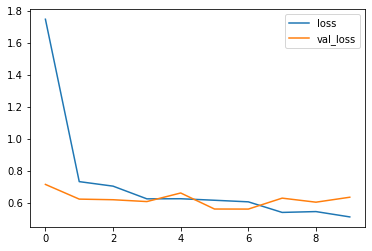

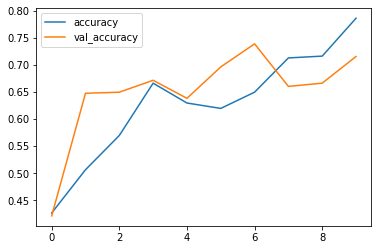

In [57]:
import matplotlib.pyplot as plt
plt.plot(model.history.history["loss"], label="loss")
plt.plot(model.history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()

plt.plot(model.history.history["accuracy"], label="accuracy")
plt.plot(model.history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()
plt.close()

In [59]:
!pip freeze > requirements.txt